In [312]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [313]:


# Load the .csv file into a DataFrame
df = pd.read_csv("/Users/sherrywang/deposit-prediction/cleaned_data/data_clean.csv")


# Set display options for maximum rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns




In [314]:
df

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,Mortgage rate,Prime rate,House Price Index (Level),Commercial Real Estate Price Index (Level),Nominal GDP,Real GDP,Nominal disposable income,Real disposable income,Loans to individuals,Credit cards,Other loans to individuals,Deposits,Interest-bearing deposits,Noninterest-bearing deposits,Time deposits
0,1984Q1,8.1,12.5,7.9,12.7,7.9,5.8,9.2,11.7,11.9,13.3,11.1,49.0,90.5,35748.01,4370.98,30668.53,3494.10,261504,46521,214984,2697459,1860467,363956,1242574
1,1984Q2,7.1,10.8,6.6,10.8,7.4,3.8,9.8,13.0,13.2,14.0,12.3,49.6,91.4,39608.80,4681.32,33980.73,3724.71,277997,51159,226839,2773230,1921613,379300,1306506
2,1984Q3,3.9,7.7,5.3,8.6,7.4,3.5,10.3,12.8,12.9,14.5,13.0,50.3,92.0,42658.68,4863.89,36903.07,3922.12,293062,56645,236417,2781986,1964713,364125,1370983
3,1984Q4,3.3,6.4,3.4,5.9,7.3,3.5,8.8,11.5,11.8,13.6,11.8,50.7,92.5,45388.84,5024.40,39080.35,4055.47,311074,64110,246963,2907668,2043037,421536,1407295
4,1985Q1,3.9,8.1,-1.0,3.8,7.2,3.7,8.2,11.3,11.6,13.1,10.5,51.3,93.2,49065.34,5220.35,40565.40,4014.92,319656,67028,252628,2916647,2086014,371462,1413727
5,1985Q2,3.6,6.3,8.2,11.8,7.3,3.7,7.5,10.5,10.9,12.8,10.2,52.4,93.4,52156.46,5408.28,45352.12,4344.14,336395,71279,265116,2984331,2124432,400009,1427994
6,1985Q3,6.3,8.8,-1.1,2.0,7.2,2.5,7.1,10.0,10.5,12.1,9.5,52.9,93.9,56746.23,5749.00,46259.16,4296.35,352401,75943,276458,3051300,2162307,424541,1443518
7,1985Q4,3.0,5.3,4.5,7.4,7.0,4.1,7.2,9.4,10.0,11.7,9.5,53.9,92.3,59753.78,5921.47,49682.34,4489.69,366687,83691,282996,3140827,2216165,460092,1470308
8,1986Q1,3.8,5.9,5.5,8.6,7.0,2.1,6.9,8.4,8.8,10.6,9.4,55.0,94.1,63279.25,6146.49,53955.02,4736.62,367785,85172,282613,3163361,2394640,430845,1495136
9,1986Q2,1.8,3.4,5.1,4.7,7.2,-1.9,6.1,7.7,7.9,10.2,8.6,56.1,95.9,65430.74,6257.13,56490.91,4978.19,379488,89240,290247,3211717,2422642,461751,1481060


In [315]:
df_X=  df.iloc[:, :-7]
df_X= df_X.drop(columns=['Date'])

In [316]:
df_X

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,Mortgage rate,Prime rate,House Price Index (Level),Commercial Real Estate Price Index (Level),Nominal GDP,Real GDP,Nominal disposable income,Real disposable income
0,8.1,12.5,7.9,12.7,7.9,5.8,9.2,11.7,11.9,13.3,11.1,49.0,90.5,35748.01,4370.98,30668.53,3494.10
1,7.1,10.8,6.6,10.8,7.4,3.8,9.8,13.0,13.2,14.0,12.3,49.6,91.4,39608.80,4681.32,33980.73,3724.71
2,3.9,7.7,5.3,8.6,7.4,3.5,10.3,12.8,12.9,14.5,13.0,50.3,92.0,42658.68,4863.89,36903.07,3922.12
3,3.3,6.4,3.4,5.9,7.3,3.5,8.8,11.5,11.8,13.6,11.8,50.7,92.5,45388.84,5024.40,39080.35,4055.47
4,3.9,8.1,-1.0,3.8,7.2,3.7,8.2,11.3,11.6,13.1,10.5,51.3,93.2,49065.34,5220.35,40565.40,4014.92
5,3.6,6.3,8.2,11.8,7.3,3.7,7.5,10.5,10.9,12.8,10.2,52.4,93.4,52156.46,5408.28,45352.12,4344.14
6,6.3,8.8,-1.1,2.0,7.2,2.5,7.1,10.0,10.5,12.1,9.5,52.9,93.9,56746.23,5749.00,46259.16,4296.35
7,3.0,5.3,4.5,7.4,7.0,4.1,7.2,9.4,10.0,11.7,9.5,53.9,92.3,59753.78,5921.47,49682.34,4489.69
8,3.8,5.9,5.5,8.6,7.0,2.1,6.9,8.4,8.8,10.6,9.4,55.0,94.1,63279.25,6146.49,53955.02,4736.62
9,1.8,3.4,5.1,4.7,7.2,-1.9,6.1,7.7,7.9,10.2,8.6,56.1,95.9,65430.74,6257.13,56490.91,4978.19


In [317]:


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(df_reduced)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=14)
feature_pca = pca.fit_transform(feature_scaled)

# Check the amount of variance explained by the components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance with {pca.n_components_} components: {explained_variance:.2f}")

NameError: name 'df_reduced' is not defined

In [318]:
df_train = df.iloc[:-20].copy()
df_test = df.drop(df_train.index).copy()


In [319]:
dep_train = df['Deposits'].iloc[:-20].copy()
date_train = df['Date'].iloc[:-20].copy()
#tv_test = df.drop(tv_train.index).copy()
dep_test = df.drop(dep_train.index).copy()
date_test = df.drop(date_train.index).copy()




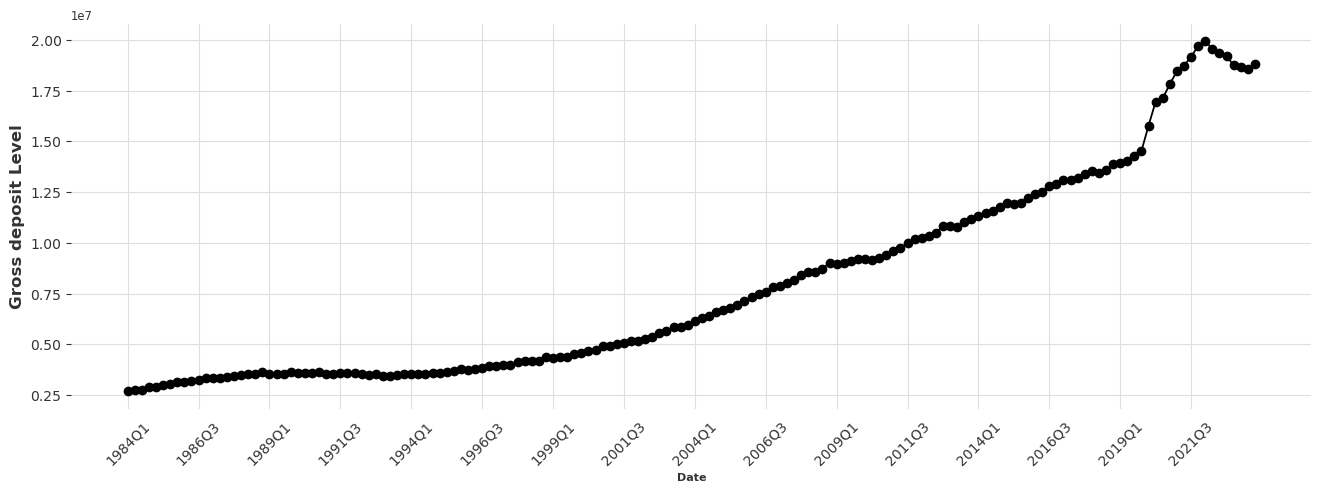

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


plt.figure(figsize=(16,5))

plt.plot(df.Date,
            df.Deposits,
            '-o')

plt.xticks(df.Date[::10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Date", fontsize=8)
plt.ylabel("Gross deposit Level", fontsize=12)

plt.show()

In [321]:
import statsmodels.api as sm

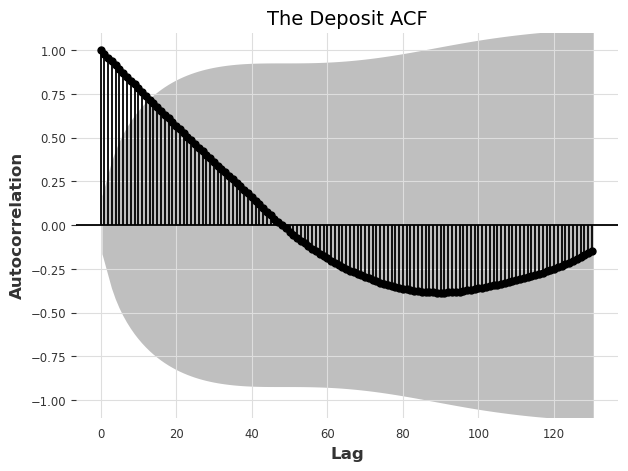

In [322]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

sm.graphics.tsa.plot_acf(dep_train.values,
                            lags = 130,
                            ax = ax)

plt.title('The Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

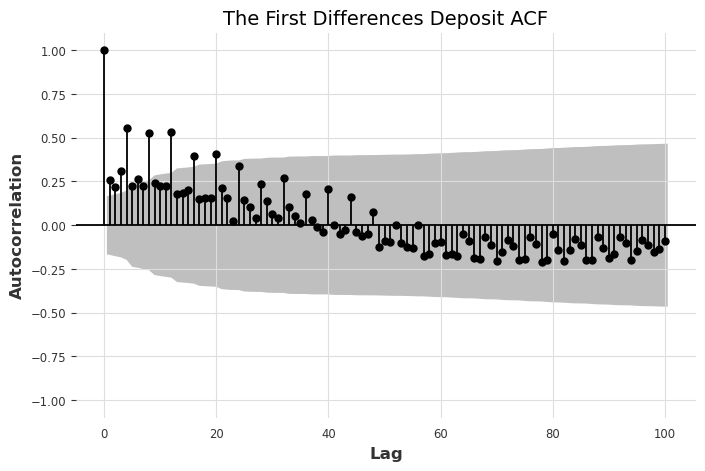

In [323]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))

sm.graphics.tsa.plot_acf(dep_train.diff(1).values[1:],
                               lags=100,
                               ax=ax)

plt.title('The First Differences Deposit ACF', fontsize=14)
plt.ylabel("Autocorrelation", fontsize=12)
plt.xlabel("Lag", fontsize=12)

plt.ylim(-1.1,1.1)

plt.show()

#some changes

In [324]:
from statsmodels.tsa.api import ARIMA

In [325]:
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n-m):
        denom += np.abs(y_train[i+1:i+m+1] - y_train[i]*np.ones(m)).mean()
    denom = denom / (n-m)
    num = np.abs(y_test - y_preds).mean()
    return num/denom


In [326]:
from sklearn.model_selection import TimeSeriesSplit
!pip install pmdarima
from pmdarima import auto_arima

In [327]:
cv = TimeSeriesSplit(n_splits=10, test_size=3)


In [20]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#use one trainning set to fit and get lowest average
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_score = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 12
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []

    # Step 1: Fit the ARIMA model using the entire training dataset
    try:
        print(f"Fitting ARIMA model for m={m} on the entire training set...")
        model = auto_arima(
            dep_train.values,  # Entire training dataset
            seasonal=True,
            m=m,
            D = 1,
            max_p=10,
            max_q=10,
            trace=False,
            error_action='ignore',
            suppress_warnings=True,
            stepwise=True
        )
        print(f"Fitted model for m={m}")
    except Exception as e:
        print(f"Failed to fit model for m={m}: {e}")
        continue

    # Step 2: Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test for the current fold
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Predict on the test set using the pre-fitted model
            preds = model.predict(len(test), exogenous=None)
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Step 3: Compute the average MASE score across folds
    if fold_scores:
        avg_score = np.mean(fold_scores)
        print(f"  Average MASE for m={m}: {avg_score:.4f}")
        results[m] = avg_score

        # Update the best m if the average score is lower
        if avg_score < best_score:
            best_score = avg_score
            best_m = m

# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best average MASE: {best_score:.4f}")

# Print all results for reference
print("All MASE scores per m:")
for m, score in results.items():
    print(f"  m={m}: {score:.4f}")


Evaluating seasonal period m=1
Fitting ARIMA model for m=1 on the entire training set...
Fitted model for m=1
  Fold 1
    MASE: 21.5389
 ARIMA(0,2,4)(0,0,0)[0]          
  Fold 2
    MASE: 46.2288
 ARIMA(0,2,4)(0,0,0)[0]          
  Fold 3
    MASE: 32.7804
 ARIMA(0,2,4)(0,0,0)[0]          
  Fold 4
    MASE: 12.6275
 ARIMA(0,2,4)(0,0,0)[0]          
  Fold 5
    MASE: 4.4608
 ARIMA(0,2,4)(0,0,0)[0]          
  Average MASE for m=1: 23.5273
Evaluating seasonal period m=2
Fitting ARIMA model for m=2 on the entire training set...
Fitted model for m=2
  Fold 1
    MASE: 21.1370
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 2
    MASE: 45.3079
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 3
    MASE: 31.9784
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 4
    MASE: 12.1759
 ARIMA(1,1,0)(1,1,1)[2]          
  Fold 5
    MASE: 4.1642
 ARIMA(1,1,0)(1,1,1)[2]          
  Average MASE for m=2: 22.9527
Evaluating seasonal period m=3
Fitting ARIMA model for m=3 on the entire training set...
Fitted model for m=

In [21]:
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
#best fold MASE
# Custom MASE function
def mase(y_train, y_test, y_preds):
    n = len(y_train)
    m = len(y_test)
    denom = 0
    for i in range(n - m):
        denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
    denom = denom / (n - m)
    num = np.abs(y_test - y_preds).mean()
    return num / denom

# Number of splits for cross-validation
k_folds = 5

# Initialize TimeSeriesSplit for k-fold cross-validation
tscv = TimeSeriesSplit(n_splits=k_folds)

# Placeholder for best results
best_m = None
best_scores = float('inf')
results = {}

# Iterate over seasonal periods m = 1 to 39
for m in range(1, 50):
    print(f"Evaluating seasonal period m={m}")
    fold_scores = []
    
    # Perform k-fold cross-validation
    for fold, (train_idx, test_idx) in enumerate(tscv.split(dep_train.values)):
        print(f"  Fold {fold + 1}")
        try:
            # Split the data into train and test
            train, test = dep_train.values[train_idx], dep_train.values[test_idx]
            
            # Fit auto_arima for the current fold and m
            model = auto_arima(
                train,
                seasonal=True,
                D=1,
                m=m,
                max_p=10,
                max_q=10,
                trace=False,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Predict on the test set
            preds = model.predict(len(test))
            
            # Calculate MASE for the fold
            score = mase(train, test, preds)
            print(f"    MASE: {score:.4f}")
            print(model)
            fold_scores.append(score)
        except Exception as e:
            print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
    # Average MASE score across folds
    print(model)
    results[m] = [score,model,fold]
   


# Print the best results
print(f"Best seasonal period m: {best_m}")
print(f"Best MASE: {best_scores:.4f}")
sorted_results = sorted(results.items(), key=lambda x: x[1][0])
print(sorted_results[1])


Evaluating seasonal period m=1
  Fold 1
    MASE: 1.2388
 ARIMA(0,2,0)(0,0,0)[0]          
  Fold 2
    MASE: 2.2909
 ARIMA(0,2,0)(0,0,0)[0]          
  Fold 3
    MASE: 2.2787
 ARIMA(0,2,0)(0,0,0)[0]          
  Fold 4
    MASE: 0.6131
 ARIMA(0,2,0)(0,0,0)[0]          
  Fold 5
    MASE: 2.0187
 ARIMA(0,2,0)(0,0,0)[0]          
 ARIMA(0,2,0)(0,0,0)[0]          
Evaluating seasonal period m=2
  Fold 1
    MASE: 0.1148
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 2
    MASE: 0.4357
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 3
    MASE: 2.0875
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 4
    MASE: 0.3727
 ARIMA(0,1,0)(0,1,0)[2]          
  Fold 5
    MASE: 0.1545
 ARIMA(1,1,0)(1,1,1)[2]          
 ARIMA(1,1,0)(1,1,1)[2]          
Evaluating seasonal period m=3
  Fold 1
    MASE: 0.1428
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 2
    MASE: 0.3314
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 3
    MASE: 2.5843
 ARIMA(0,1,0)(0,1,0)[3]          
  Fold 4
    MASE: 0.9519
 ARIMA(0,1,0)(0,1,0)[3]          

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=16, fold=1: Input contains NaN.
  Fold 2
    MASE: 7.7803
 ARIMA(3,2,0)(2,1,0)[16]          
  Fold 3
    MASE: 1.1873
 ARIMA(0,2,1)(0,1,0)[16] intercept
  Fold 4
    MASE: 2.1426
 ARIMA(0,2,1)(0,1,0)[16] intercept
  Fold 5
    MASE: 0.4572
 ARIMA(1,1,1)(0,1,0)[16]          
 ARIMA(1,1,1)(0,1,0)[16]          
Evaluating seasonal period m=17
  Fold 1
    MASE: 1.5512
 ARIMA(1,0,1)(1,1,0)[17]          
  Fold 2
    MASE: 4.9873
 ARIMA(2,2,2)(0,1,1)[17] intercept
  Fold 3
    MASE: 3.1009
 ARIMA(0,2,0)(0,1,2)[17]          
  Fold 4
    MASE: 2.4471
 ARIMA(1,2,1)(0,1,0)[17] intercept
  Fold 5
    MASE: 0.6981
 ARIMA(0,1,0)(0,1,2)[17]          
 ARIMA(0,1,0)(0,1,2)[17]          
Evaluating seasonal period m=18
  Fold 1
    MASE: 1.1934
 ARIMA(0,0,0)(0,1,0)[18] intercept
  Fold 2
    MASE: 2.6638
 ARIMA(0,2,1)(0,1,0)[18]          
  Fold 3
    MASE: 1.3508
 ARIMA(1,2,1)(0,1,0)[18] intercept
  Fold 4
    MASE: 2.5588
 ARIMA(0,2,1)(0,1,0)[18] intercept
  Fold 5
    MASE: 0.406

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=19, fold=1: Input contains NaN.
  Fold 2
    MASE: 2.8106
 ARIMA(0,2,1)(0,1,0)[19]          
  Fold 3
    MASE: 1.1403
 ARIMA(1,2,1)(1,1,1)[19] intercept
  Fold 4
    MASE: 3.0742
 ARIMA(1,2,1)(0,1,0)[19] intercept
  Fold 5
    MASE: 0.4699
 ARIMA(1,1,1)(1,1,1)[19]          
 ARIMA(1,1,1)(1,1,1)[19]          
Evaluating seasonal period m=20
  Fold 1


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=20, fold=1: Input contains NaN.
  Fold 2
    MASE: 0.9860
 ARIMA(0,2,1)(0,1,2)[20]          
  Fold 3
    MASE: 2.0408
 ARIMA(0,2,2)(1,1,1)[20] intercept
  Fold 4
    MASE: 1.9332
 ARIMA(0,2,2)(1,1,0)[20]          
  Fold 5
    MASE: 0.5169
 ARIMA(1,1,1)(1,1,0)[20]          
 ARIMA(1,1,1)(1,1,0)[20]          
Evaluating seasonal period m=21
  Fold 1
    MASE: 1.0948
 ARIMA(0,0,0)(0,1,0)[21] intercept
  Fold 2
    MASE: 2.1776
 ARIMA(2,2,1)(2,1,0)[21]          
  Fold 3
    MASE: 1.3324
 ARIMA(0,2,0)(0,1,2)[21]          
  Fold 4
    MASE: 3.0567
 ARIMA(1,2,1)(2,1,0)[21] intercept
  Fold 5
    MASE: 0.4911
 ARIMA(2,1,1)(0,1,2)[21]          
 ARIMA(2,1,1)(0,1,2)[21]          
Evaluating seasonal period m=22
  Fold 1


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=22, fold=1: Input contains NaN.
  Fold 2
    MASE: 5.5576
 ARIMA(0,2,1)(0,1,0)[22] intercept
  Fold 3
    MASE: 1.4111
 ARIMA(0,2,2)(0,1,0)[22]          
  Fold 4
    MASE: 3.3911
 ARIMA(0,2,1)(0,1,0)[22] intercept
  Fold 5
    MASE: 0.4326
 ARIMA(1,1,1)(1,1,1)[22]          
 ARIMA(1,1,1)(1,1,1)[22]          
Evaluating seasonal period m=23
  Fold 1
    Failed for m=23, fold=1: too many indices for array: array is 0-dimensional, but 1 were indexed
  Fold 2
    MASE: 6.4049
 ARIMA(4,2,1)(2,1,1)[23] intercept
  Fold 3
    MASE: 4.2715
 ARIMA(0,2,0)(0,1,2)[23]          
  Fold 4
    MASE: 3.1330
 ARIMA(1,2,1)(0,1,0)[23] intercept
  Fold 5
    MASE: 0.2125
 ARIMA(1,2,1)(2,1,0)[23]          
 ARIMA(1,2,1)(2,1,0)[23]          
Evaluating seasonal period m=24
  Fold 1
    Failed for m=24, fold=1: too many indices for array: array is 0-dimensional, but 1 were indexed
  Fold 2
    MASE: 9.1365
 ARIMA(3,2,0)(1,1,0)[24] intercept
  Fold 3
    MASE: 1.8042
 ARIMA(1,2,1)(0,1,1)[24]

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=30, fold=2: Input contains NaN.
  Fold 3
    MASE: 1.0546
 ARIMA(3,2,1)(2,1,0)[30]          
  Fold 4
    MASE: 0.7403
 ARIMA(1,2,2)(0,1,1)[30]          
  Fold 5
    MASE: 0.4849
 ARIMA(1,2,1)(0,1,0)[30]          
 ARIMA(1,2,1)(0,1,0)[30]          
Evaluating seasonal period m=31
  Fold 1
    Failed for m=31, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=31, fold=2: Input contains NaN.
  Fold 3
    MASE: 2.7647
 ARIMA(1,2,1)(0,1,0)[31] intercept
  Fold 4
    MASE: 6.9245
 ARIMA(0,2,0)(0,1,2)[31]          
  Fold 5
    MASE: 0.6342
 ARIMA(0,2,1)(0,1,0)[31]          
 ARIMA(0,2,1)(0,1,0)[31]          
Evaluating seasonal period m=32
  Fold 1
    Failed for m=32, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2
    MASE: 0.9445
 ARIMA(1,2,0)(1,1,0)[32]          
  Fold 3
    MASE: 1.2529
 ARIMA(1,2,1)(2,1,0)[32]          
  Fold 4
    MASE: 1.6064
 ARIMA(1,2,0)(0,1,0)[32]          
  Fold 5
    MASE: 1.2676
 ARIMA(0,2,2)(0,1,0)[32] intercept
 ARIMA(0,2,2)(0,1,0)[32] intercept
Evaluating seasonal period m=33
  Fold 1
    Failed for m=33, fold=1: The seasonal diff

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=38, fold=2: Input contains NaN.
  Fold 3
    MASE: 7.1714
 ARIMA(3,2,1)(1,1,0)[38]          
  Fold 4
    MASE: 0.6333
 ARIMA(1,2,0)(0,1,0)[38]          
  Fold 5
    MASE: 0.4957
 ARIMA(2,2,0)(0,1,0)[38]          
 ARIMA(2,2,0)(0,1,0)[38]          
Evaluating seasonal period m=39
  Fold 1
    Failed for m=39, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=39, fold=2: Input contains NaN.
  Fold 3
    Failed for m=39, fold=3: Input contains NaN.
  Fold 4
    MASE: 1.9460
 ARIMA(0,2,0)(0,1,1)[39]          
  Fold 5
    MASE: 2.6024
 ARIMA(0,2,0)(0,1,1)[39]          
 ARIMA(0,2,0)(0,1,1)[39]          
Evaluating seasonal period m=40
  Fold 1
    Failed for m=40, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2
    MASE: 1.3927
 ARIMA(1,0,1)(0,1,1)[40] intercept
  Fold 3
    MASE: 3.0280
 ARIMA(1,2,0)(0,1,0)[40]          
  Fold 4
    MASE: 0.3693
 ARIMA(0,2,0)(0,1,1)[40]          
  Fold 5
    MASE: 1.5693
 ARIMA(0,2,0)(0,1,1)[40]          
 ARIMA(0,2,0)(0,1,1)[40]          
Evaluating seasonal period m=41
  Fold 1
    Failed for m=41, fold=1: The seasonal differe

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    MASE: 0.8026
 ARIMA(1,0,1)(0,1,0)[42] intercept
  Fold 3
    MASE: 0.9553
 ARIMA(0,2,0)(0,1,1)[42]          
  Fold 4
    MASE: 0.4706
 ARIMA(1,2,0)(0,1,0)[42]          
  Fold 5
    MASE: 1.8544
 ARIMA(1,2,0)(0,1,0)[42]          
 ARIMA(1,2,0)(0,1,0)[42]          
Evaluating seasonal period m=43
  Fold 1
    Failed for m=43, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=43, fold=2: Input contains NaN.
  Fold 3
    Failed for m=43, fold=3: Input contains NaN.
  Fold 4
    MASE: 1.0661
 ARIMA(0,2,0)(0,1,1)[43]          
  Fold 5
    MASE: 1.2102
 ARIMA(0,2,0)(0,1,1)[43]          
 ARIMA(0,2,0)(0,1,1)[43]          
Evaluating seasonal period m=44
  Fold 1
    Failed for m=44, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2
    MASE: 0.8553
 ARIMA(1,0,0)(0,1,1)[44] intercept
  Fold 3
    MASE: 2.8228
 ARIMA(1,2,0)(0,1,0)[44]          
  Fold 4
    MASE: 1.1971
 ARIMA(0,2,0)(0,1,1)[44]          
  Fold 5
    MASE: 0.9752
 ARIMA(0,2,2)(2,1,0)[44]          
 ARIMA(0,2,2)(2,1,0)[44]          
Evaluating seasonal period m=45
  Fold 1
    Failed for m=45, fold=1: The seasonal differe

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=45, fold=2: Input contains NaN.
  Fold 3
    MASE: 1.9918
 ARIMA(3,2,1)(1,1,0)[45]          
  Fold 4
    MASE: 2.1887
 ARIMA(0,2,0)(0,1,1)[45]          
  Fold 5
    MASE: 1.8136
 ARIMA(0,2,0)(0,1,1)[45]          
 ARIMA(0,2,0)(0,1,1)[45]          
Evaluating seasonal period m=46
  Fold 1
    Failed for m=46, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2
    Failed for m=46, fold=2: too many indices for array: array is 0-dimensional, but 1 were indexed
  Fold 3
    MASE: 1.7475
 ARIMA(3,2,1)(1,1,0)[46]          
  Fold 4
    MASE: 0.5792
 ARIMA(1,2,0)(0,1,0)[46]          
  Fold 5
    MASE: 0.3454
 ARIMA(2,2,0)(0,1,0)[46]          
 ARIMA(2,2,0)(0,1,0)[46]          
Evaluating seasonal period m=47
  Fold 

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1905: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1898: RuntimeWarning: divide by zero encountered in reciprocal
  return n

    Failed for m=48, fold=3: Input contains NaN.
  Fold 4
    MASE: 5.8437
 ARIMA(1,2,2)(1,1,0)[48]          
  Fold 5
    MASE: 0.8914
 ARIMA(1,1,3)(0,1,0)[48] intercept
 ARIMA(1,1,3)(0,1,0)[48] intercept
Evaluating seasonal period m=49
  Fold 1
    Failed for m=49, fold=1: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 2
    Failed for m=49, fold=2: The seasonal differencing order, D=1, was too large for your time series, and after differencing, there are no samples remaining in your data. Try a smaller value for D, or if you didn't set D to begin with, try setting it explicitly. This can also occur in seasonal settings when m is too large.
  Fold 3
    MASE: 2.0706
 ARIMA(4,1,2)(1,1,0)[49] intercept
  Fold 4
    MASE: 6.3047
 ARIM

In [22]:
sorted_results[1]


(4,
 [0.15225235472411924,
  ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 4),
        suppress_warnings=True, with_intercept=False),
  4])

In [328]:
from sklearn.model_selection import TimeSeriesSplit

# Example time series data (replace with your actual data)
time_series_data = dep_train.values  # Assuming dep_train is your data

# Number of splits for TimeSeriesSplit
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

# Iterate over the splits and print the indices
for fold, (train_idx, test_idx) in enumerate(tscv.split(time_series_data)):
    print(f"Fold {fold + 1}")
    print(f"  Train indices: {train_idx}")
    print(f"  Test indices: {test_idx}")
    print(f"  Train data: {time_series_data[train_idx]}")
    print(f"  Test data: {time_series_data[test_idx]}")


Fold 1
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
  Test indices: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
  Train data: [2697459 2773230 2781986 2907668 2916647 2984331 3051300 3140827 3163361
 3211717 3234567 3366694 3331095 3362417 3378470 3473275 3490929 3540442
 3570436 3626504 3547584 3561085 3570669 3630852 3571917]
  Test data: [3600282 3611503 3637392 3568883 3560912 3583014 3594403 3575056 3533961
 3495000 3527089 3456493 3468587 3477069 3528515 3523313 3522903 3541193
 3611620 3607127 3651929 3673870 3769482]
Fold 2
  Train indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
  Test indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
  Train data: [2697459 2773230 2781986 2907668 2916647 2984331 3051300 3140827 3163361
 3211717 3234567 3366694 3331095 3362417 337847

In [329]:
#lowest average

sarima = ARIMA(dep_train.values,
                    order = (0,2,0),
                    seasonal_order = (0,1,1,40)).fit()
sarima.summary()
#(1,2,2)(0,0,0)[3]  
#(0,2,0)(0,1,1)[40] 

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  140
Model:             ARIMA(0, 2, 0)x(0, 1, [1], 40)   Log Likelihood               -1276.970
Date:                            Fri, 29 Nov 2024   AIC                           2557.941
Time:                                    16:24:19   BIC                           2563.111
Sample:                                         0   HQIC                          2560.032
                                            - 140                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L40      -0.0440      0.052     -0.846      0.397      -0.146       0.058
sigma2      1.233e+10   7.83e-13   1.57e+22      0.000    1.23e+10    1.23e+10
===================================================================================
Ljung-Box (L1) (Q):                  31.08   Jarque-Bera (JB):                33.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.21   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+38. Standard errors may be unstable.
"""

In [330]:
dep_test.Deposits.shape

(20,)

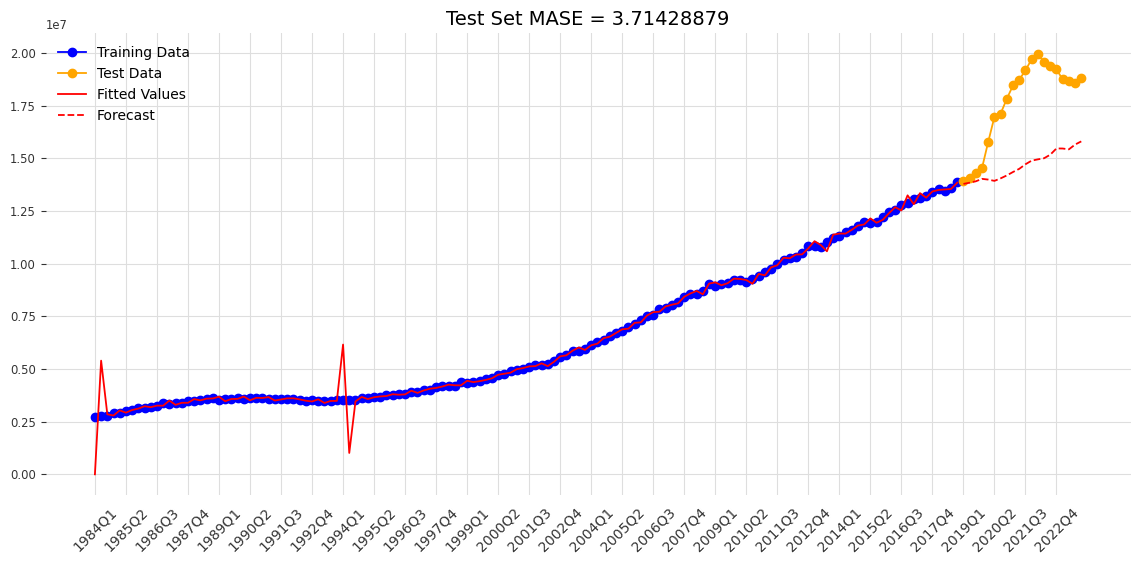

In [645]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.Date,
         dep_test.Deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_test.Date,
         sarima.forecast(len(date_test)),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.Date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()







In [648]:
#Best fold_MASE ARIMA
sarima1 = ARIMA(dep_train.values,
                    order = (0,1,0),
                    seasonal_order = (0,1,0,4)).fit()
sarima1.summary()
#(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 4)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                               y   No. Observations:                  140
Model:             ARIMA(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood               -1712.657
Date:                         Fri, 29 Nov 2024   AIC                           3427.315
Time:                                 18:55:44   BIC                           3430.220
Sample:                                      0   HQIC                          3428.495
                                         - 140                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.897e+09   5.88e+08     10.030      0.000    4.75e+09    7.05e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.98   Prob(JB):                         0.19
Heteroskedasticity (H):              10.37   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

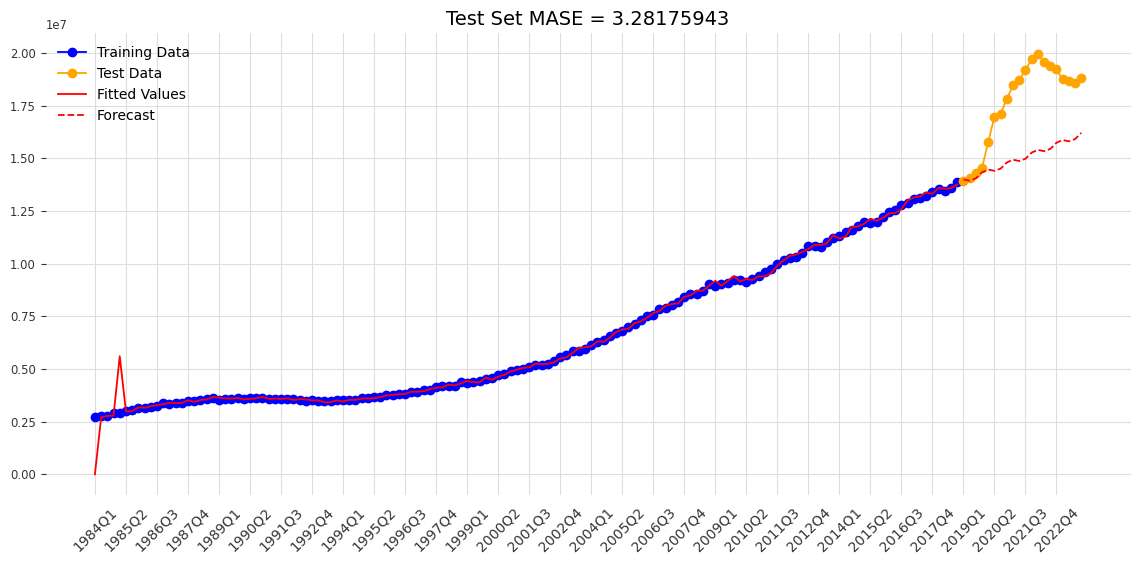

In [649]:
#(1,0,1)(2,1,1)[2]

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def mase(y_true, y_pred, training_series):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    training_series = np.array(training_series)
    
    # MAE for the model
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Naive forecast MAE
    naive_diff = np.abs(training_series[1:] - training_series[:-1])
    naive_mae = np.mean(naive_diff)
    
    if naive_mae == 0:
        return np.nan  # Avoid division by zero
    
    return mae / naive_mae




plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.Date,
         dep_test.Deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima1.fittedvalues,
         'r',
         label='Fitted Values')


# Forecasting and plotting for test data
plt.plot(date_test.Date,
         sarima1.forecast(len(date_test)),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(test_mase1,8)),
             fontsize=14)
# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.Date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()


In [394]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(df_X)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=9)
feature_pca = pca.fit_transform(feature_scaled)

# Check the amount of variance explained by the components
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained variance with {pca.n_components_} components: {explained_variance:.2f}")

Explained variance with 9 components: 1.00


In [617]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df['Deposits'], test_size=0.1, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression with normalized data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Retrieve coefficients
coefficients = lasso.coef_
feature_names = df_X.columns

# Combine feature names with coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort coefficients in descending order by absolute value
# Assuming coef_df is a DataFrame that contains a 'Coefficient' column
sorted_coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)


# Display sorted coefficients
print(sorted_coef_df)




                                       Feature   Coefficient
7                        5-year Treasury yield  2.468804e+06
13                                 Nominal GDP  2.303831e+06
12  Commercial Real Estate Price Index (Level)  1.980276e+06
8                       10-year Treasury yield -1.948706e+06
15                   Nominal disposable income -1.765352e+06
14                                    Real GDP  1.716788e+06
16                      Real disposable income  1.659539e+06
11                   House Price Index (Level) -1.343899e+06
2                Real disposable income growth -1.120865e+06
3             Nominal disposable income growth  1.061936e+06
9                                Mortgage rate -9.418313e+05
0                              Real GDP growth -9.055516e+05
1                           Nominal GDP growth  8.929952e+05
6                        3-month Treasury rate -7.958369e+05
4                            Unemployment rate  6.552397e+05
10                      

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.401e+12, tolerance: 3.642e+11
  model = cd_fast.enet_coordinate_descent(


In [626]:
# Example indices of the columns you want to pick
indices_to_pick =  [0, 1,  7,  8, 11, 12, 13, 14, 15, 16]
#[ 0  1  7  8  9 11 12 13 14 15 16]
#12:[ 0  1  4  7  8  9 11 12 13 14 15 16]
#[ 0,  1,  7,  8, 11, 12, 13, 14, 15, 16]-10
#[ 0  7  8 11 12 13 15 16]-8
#[7,13,12,8,14,15,16,11,2]--abs lasso
# Replace with your desired column indices
#[ 0, 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 14](RFE)
#[20,21,14,19,3,8,12,4,22,5,18]
#[20,21,14,12,4,22,5,18,1,17]-8000
#[20,21,14,19,12,4,22,5,18,1,17]-3500
#[20,21,14,19,3,8,12,4,22,5,18,1,3,17]---2000
# Select columns based on the indices
selected_columns = df_X.iloc[:, indices_to_pick]
train_features = selected_columns.iloc[:-20]


In [618]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df_X and df['Deposits'] are defined

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df['Deposits'], test_size=0.1, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso as the estimator for RFE
lasso = Lasso(alpha=0.1, max_iter=5000)

# Initialize RFE with Lasso as the estimator
selector = RFE(estimator=lasso, n_features_to_select=10)

# Fit the RFE model to the data
selector = selector.fit(X_train_scaled, y_train)

# Get the selected features
selected_mask = selector.get_support()

# Print which features are selected
selected_features = np.where(selected_mask)[0]

print(f"Selected features based on RFE with Lasso: {selected_features}")


Selected features based on RFE with Lasso: [ 0  1  7  8 11 12 13 14 15 16]


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.212e+12, tolerance: 3.642e+11
  model = cd_fast.enet_coordinate_descent(
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.600e+12, tolerance: 3.642e+11
  model = cd_fast.enet_coordinate_descent(
/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [540]:
selected_indices

array([ 7,  8, 13, 15, 16])

In [627]:
selected_indices = np.where(selected_mask)[0]
#[0,3,4,5,6,9,10,11,12]

In [628]:
test_features = selected_columns.iloc[-20:]
test_features


,Real GDP growth,Nominal GDP growth,5-year Treasury yield,10-year Treasury yield,House Price Index (Level),Commercial Real Estate Price Index (Level),Nominal GDP,Real GDP,Nominal disposable income,Real disposable income
140,2.2,3.6,2.5,2.7,207.4,284.1,30198957.35,181508.10,31973826.36,169430.76
141,3.4,5.4,2.1,2.4,209.4,296.6,31829701.05,187679.38,32549355.23,168922.47
142,4.6,5.9,1.7,1.8,211.9,294.3,33707653.41,196312.63,33786230.73,173652.30
143,2.6,3.9,1.6,1.8,215.0,291.3,35022251.89,201416.76,35103893.73,177646.30
144,-5.3,-3.5,1.2,1.4,218.1,295.7,33796473.07,190741.67,36402737.80,181909.81
145,-28.0,-29.2,0.4,0.7,219.7,288.9,23927902.93,137334.00,52128720.53,265042.59
146,34.8,39.7,0.3,0.6,227.0,295.2,33427280.39,185126.23,46707333.59,229791.93
147,4.2,7.1,0.4,0.9,235.5,304.6,35800617.30,192901.53,43998308.24,212097.95
148,5.2,10.9,0.6,1.4,243.0,308.9,39702884.59,202932.41,71937233.97,330872.80
149,6.2,12.8,0.8,1.6,254.7,317.1,44784853.82,215514.22,55319732.92,239551.91


In [629]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]
#(1,0,1)(2,1,1)[2]
#(1,2,2)(0,0,0)[3] 
model = SARIMAX(
    endog = dep_train.values,
    exog = train_features,  # Pass None if no exogenous variables
    order = (0,2,0), # Example: (1, 1, 1)
    seasonal_order = (0,1,1,40),  # Example: (1, 1, 1, 12) for yearly seasonality
)
sarima_fea = model.fit(disp=False)
sarima_fea.summary()
#(0,2,0)(0,1,1)[40] 

/Users/sherrywang/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  140
Model:             SARIMAX(0, 2, 0)x(0, 1, [1], 40)   Log Likelihood               -1265.135
Date:                              Fri, 29 Nov 2024   AIC                           2554.269
Time:                                      18:40:46   BIC                           2585.289
Sample:                                           0   HQIC                          2566.816
                                              - 140                                         
Covariance Type:                                opg                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Real GDP growth                             2.526e+04   9378.164      2.694      0.007    6883.145    4.36e+04
Nominal GDP growth                          -2.56e+04   8159.531     -3.138      0.002   -4.16e+04   -9612.350
5-year Treasury yield                      -1.379e+04   6.07e+04     -0.227      0.820   -1.33e+05    1.05e+05
10-year Treasury yield                     -7408.0908   5.95e+04     -0.124      0.901   -1.24e+05    1.09e+05
House Price Index (Level)                  -1.166e+04   9715.234     -1.201      0.230   -3.07e+04    7377.017
Commercial Real Estate Price Index (Level) -1722.0116   1436.809     -1.198      0.231   -4538.106    1094.083
Nominal GDP                                   -0.0276      0.095     -0.291      0.771      -0.214       0.158
Real GDP                                      13.5770     12.767      1.063      0.288     -11.446      38.599
Nominal disposable income                      0.1271      0.054      2.335      0.020       0.020       0.234
Real disposable income                       -14.9788      7.475     -2.004      0.045     -29.629      -0.329
ma.S.L40                                      -0.0268      0.028     -0.959      0.338      -0.082       0.028
sigma2                                      9.672e+09      0.342   2.83e+10      0.000    9.67e+09    9.67e+09
===================================================================================
Ljung-Box (L1) (Q):                  15.26   Jarque-Bera (JB):                51.99
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.49   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.77e+26. Standard errors may be unstable.
"""

In [630]:
y_test=dep_test.Deposits.values


RMSE: 0.16591868637252408


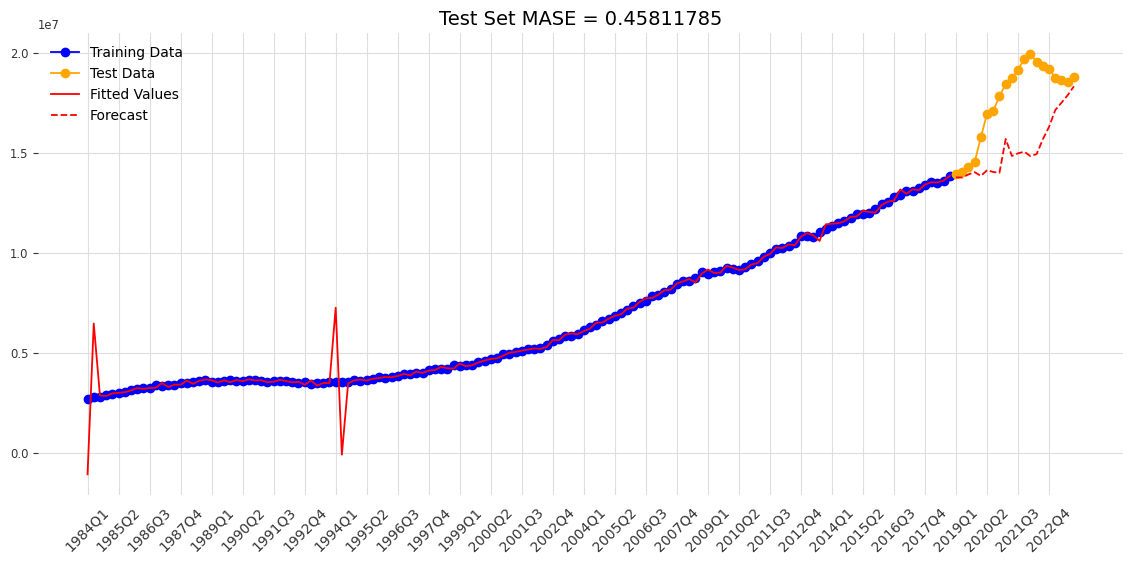

In [638]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def mase(y_true, y_pred, training_series):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    training_series = np.array(training_series)
    
    # MAE for the model
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Naive forecast MAE
    naive_diff = np.abs(training_series[1:] - training_series[:-1])
    naive_mae = np.mean(naive_diff)
    
    if naive_mae == 0:
        return np.nan  # Avoid division by zero
    
    return mae / naive_mae

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.Date,
         dep_test.Deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima_fea.fittedvalues,
         'r',
         label='Fitted Values')


# Example Usage
mase_value = mase(y_test, y_preds, y_train)

plt.plot(date_test.Date,
         sarima_fea.forecast(len(date_test),exog=test_features),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(mase_value,8)),
             fontsize=14)


rmse = np.sqrt(np.mean((np.array(y_test) - np.array(y_preds))**2))/np.mean(np.array(y_test))
print("RMSE:", rmse)
# Customize x-axis ticks to display every 10th label with rotation



xticks = np.concatenate([date_train[::5], date_test.Date[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()






In [633]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#(2,0,0)(0,1,1)[7]

model1 = SARIMAX(
    endog = dep_train.values,
    exog = train_features,  # Pass None if no exogenous variables
    order = (0,1,0), # Example: (1, 1, 1)
    seasonal_order = (0,1,0,4),  # Example: (1, 1, 1, 12) for yearly seasonality
)
sarima_fea1 = model1.fit(disp=False)
sarima_fea1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  140
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood               -1965.923
Date:                           Fri, 29 Nov 2024   AIC                           3953.846
Time:                                   18:41:20   BIC                           3985.804
Sample:                                        0   HQIC                          3966.832
                                           - 140                                         
Covariance Type:                             opg                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Real GDP growth                             1.099e+04   7.72e+05      0.014      0.989    -1.5e+06    1.52e+06
Nominal GDP growth                         -6872.9897   7.55e+05     -0.009      0.993   -1.49e+06    1.47e+06
5-year Treasury yield                      -3.323e+04   3.97e+06     -0.008      0.993   -7.82e+06    7.76e+06
10-year Treasury yield                      1.627e+04   4.32e+06      0.004      0.997   -8.46e+06    8.49e+06
House Price Index (Level)                  -1701.4830   3.89e+05     -0.004      0.997   -7.64e+05     7.6e+05
Commercial Real Estate Price Index (Level)   492.9121   9.75e+04      0.005      0.996   -1.91e+05    1.92e+05
Nominal GDP                                   -0.0018      7.825     -0.000      1.000     -15.338      15.334
Real GDP                                      -9.9527    892.234     -0.011      0.991   -1758.698    1738.793
Nominal disposable income                      0.0820      5.609      0.015      0.988     -10.912      11.076
Real disposable income                        -5.9120    733.002     -0.008      0.994   -1442.569    1430.745
sigma2                                      7.036e+11      0.539   1.31e+12      0.000    7.04e+11    7.04e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.57
Prob(Q):                              0.80   Prob(JB):                         0.28
Heteroskedasticity (H):               6.54   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.37e+30. Standard errors may be unstable.
"""

RMSE: 0.12892254811462606
RMSE1: 0.12892254811462606
Mean Absolute Error (MAE): 0.1049029024244902
Manual MASE: 0.3494797023360034


/Users/sherrywang/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


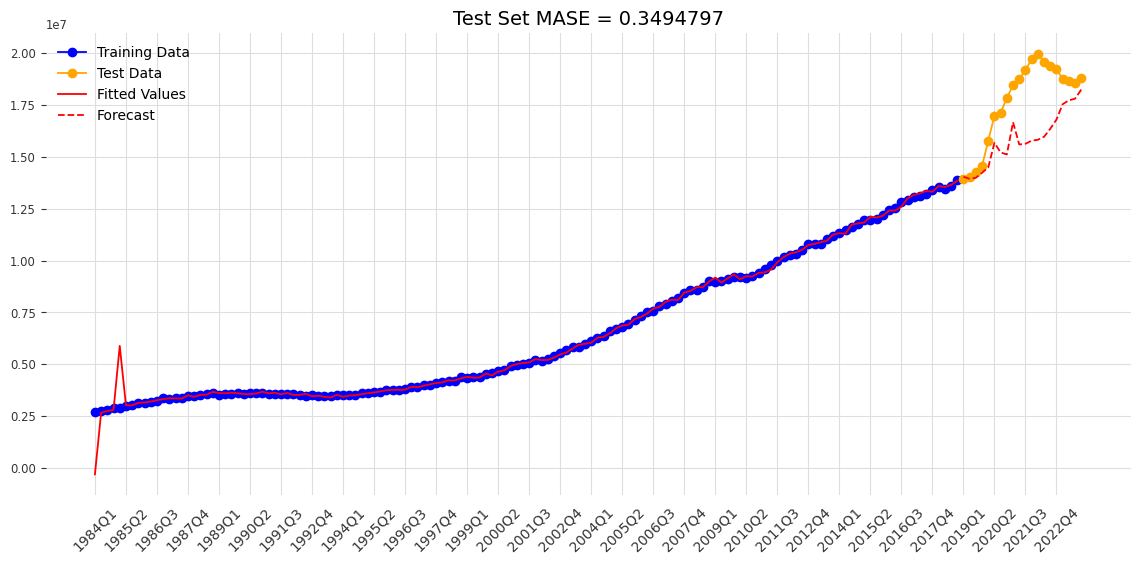

In [637]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from darts import TimeSeries
from darts.metrics import mase






plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_train,
         dep_train,
         'b-o',
         label='Training Data')

# Plot test data
plt.plot(date_test.Date,
         dep_test.Deposits,
         color='orange',
         marker='o',
         label='Test Data')

# Plot fitted values for training data
plt.plot(date_train,
         sarima_fea1.fittedvalues,
         'r',
         label='Fitted Values')


plt.plot(date_test.Date,
         sarima_fea1.forecast(len(date_test),exog=test_features),
         '--r',
         label="Forecast")
plt.title("Test Set MASE = " + str(np.round(mase_value,8)),
             fontsize=14)


# Calculate RMSE
rmse = np.sqrt(np.mean((np.array(y_test) - np.array(y_preds1))**2))/np.mean(np.array(y_test))
print("RMSE:", rmse)
rmse1 = mean_squared_error(y_test,y_preds1, squared=False)
print("RMSE1:", rmse)
# Calculate MAE
mae = mean_absolute_error(y_test,y_preds1)
print("Mean Absolute Error (MAE):", mae/np.mean(np.array(y_test)))



# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_train[::5], date_test.Date[::5]])

import numpy as np

def mase(y_true, y_pred, training_series):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    training_series = np.array(training_series)
    
    # MAE for the model
    mae = np.mean(np.abs(y_true - y_pred))
    
    # Naive forecast MAE
    naive_diff = np.abs(training_series[1:] - training_series[:-1])
    naive_mae = np.mean(naive_diff)
    
    if naive_mae == 0:
        return np.nan  # Avoid division by zero
    
    return mae / naive_mae

# Example Usage
mase_value = mase(y_test, y_preds1, y_train)
print("Manual MASE:", mase_value)

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()

